In [1]:
#Importing all the required library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Reading the Dataset
df=pd.read_excel('C:/Users/User/Documents/Data Trained/Data Science Class resources/DSData-master/Auto_mpg_data.xlsx')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165,3693,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150,3436,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150,3433,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140,3449,10.5,70,1,"""ford torino"""


In [4]:
df.columns

Index([' mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [5]:
df.shape

(398, 9)

In [6]:
df.dtypes

 mpg            float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [7]:
#Checking the null values(if any)
df.isnull().sum()

 mpg            0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [8]:
df= df.replace({'?': np.nan})

In [9]:
df.isnull().sum()

 mpg            0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [10]:
df['horsepower'].fillna(df['horsepower'].mode()[0], inplace=True)

In [11]:
df.isnull().sum()

 mpg            0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [12]:
df['horsepower']=df['horsepower'].astype(float)

In [13]:
df.dtypes

 mpg            float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

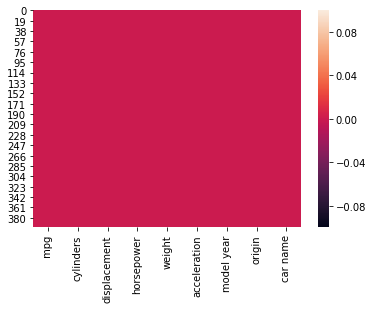

In [14]:
sns.heatmap(df.isnull())
plt.show()

In [15]:
#Statitical Summary of the data
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,105.155779,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.600986,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,130.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [16]:
#checking the correlation
dfcor=df.corr()

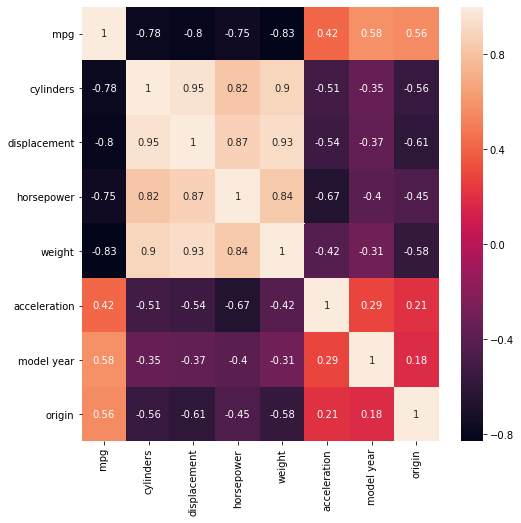

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(dfcor,annot=True)
plt.show()

In [18]:
# Univariate Analysis

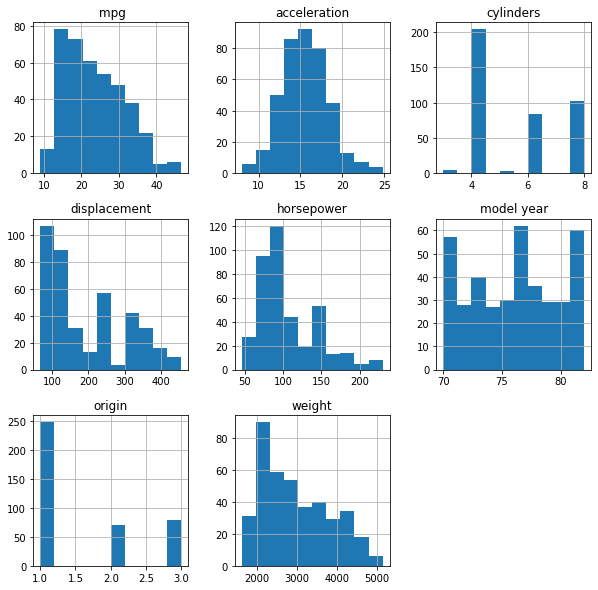

In [19]:
df.hist(figsize=(10,10))
plt.show()

In [20]:
#Bivariate Analysis

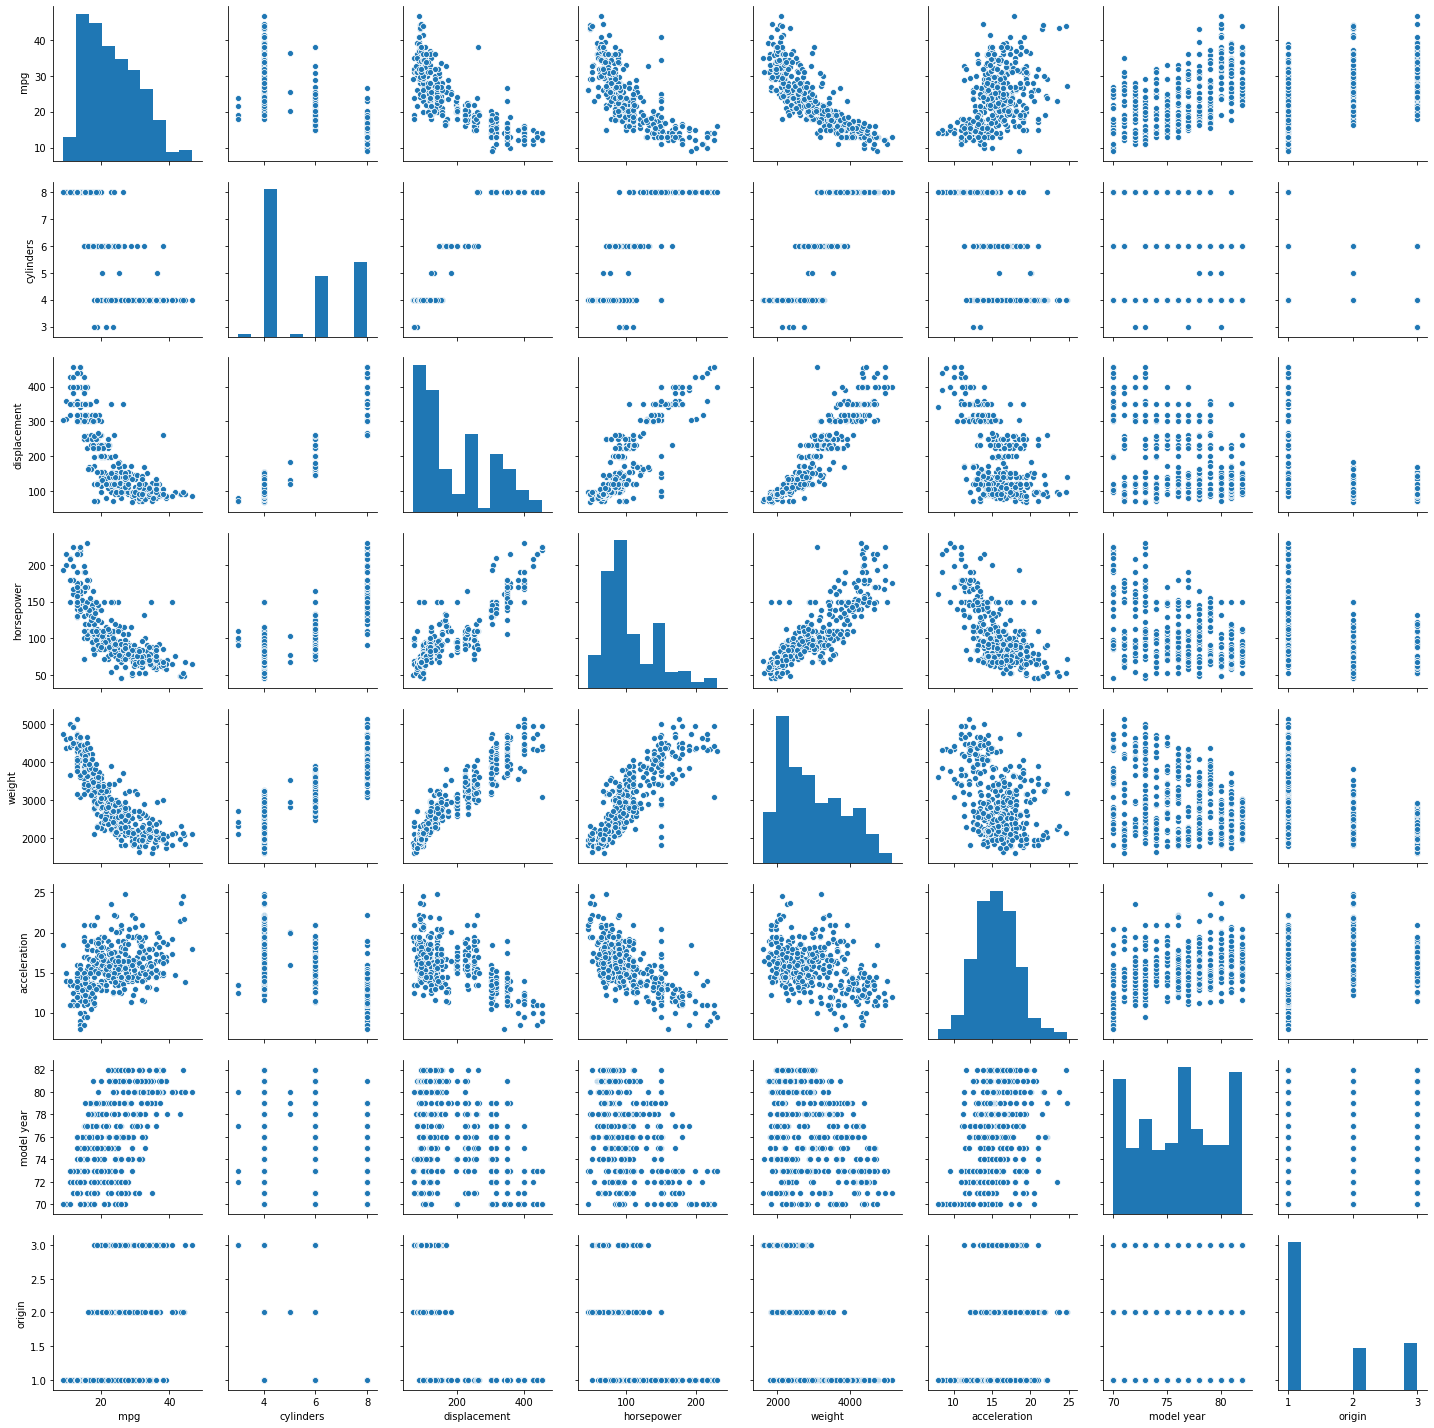

In [21]:
sns.pairplot(df)
plt.show()

In [22]:
df['car name'].value_counts()

"ford pinto"                           6
"toyota corolla"                       5
"ford maverick"                        5
"amc matador"                          5
"amc hornet"                           4
"toyota corona"                        4
"chevrolet impala"                     4
"chevrolet chevette"                   4
"peugeot 504"                          4
"amc gremlin"                          4
"pontiac catalina"                     3
"dodge colt"                           3
"honda civic"                          3
"chevrolet citation"                   3
"ford gran torino"                     3
"chevrolet nova"                       3
"chevrolet vega"                       3
"plymouth fury iii"                    3
"volkswagen dasher"                    3
"plymouth duster"                      3
"ford galaxie 500"                     3
"chevrolet caprice classic"            3
"opel 1900"                            2
"datsun 210"                           2
"oldsmobile cutl

In [23]:
#Dropping car name column
df.drop(['car name'],axis=1,inplace=True)

In [24]:
collist=df.columns.values
ncol=12
nrows=10

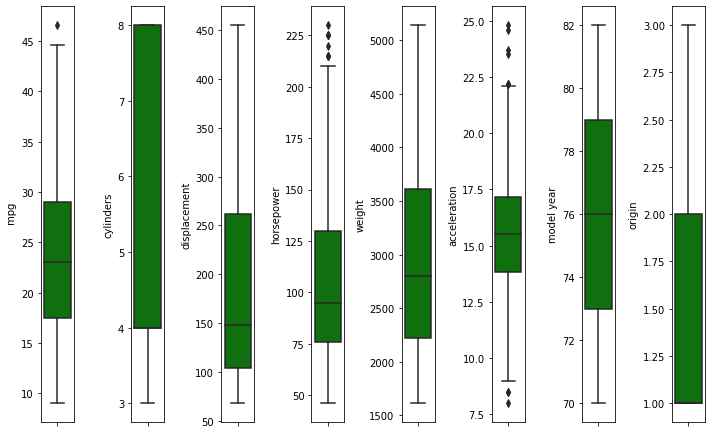

In [25]:
plt.figure(figsize=(15,60))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

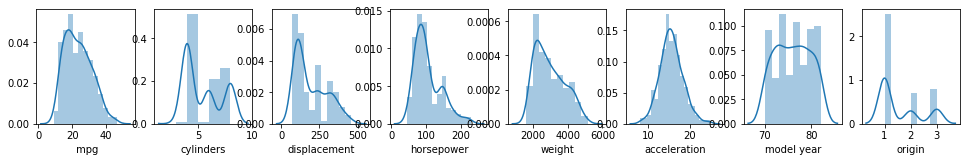

In [26]:
plt.figure(figsize=(25,25))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [27]:
#Checking the skewness of the data
df.skew()

 mpg            0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.033003
weight          0.531063
acceleration    0.278777
model year      0.011535
origin          0.923776
dtype: float64

In [28]:
#As there are few skewed values, we try correct it by using log transformation
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [29]:
df.skew()

 mpg            0.457066
cylinders       0.526922
displacement    0.228886
horsepower      0.339977
weight          0.531063
acceleration    0.278777
model year      0.011535
origin          0.796540
dtype: float64

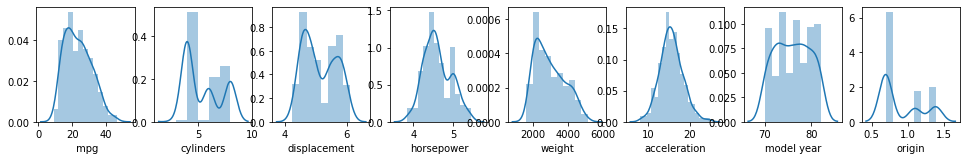

In [30]:
plt.figure(figsize=(25,25))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [31]:
#Checking the Zscore for outliers and removing (if any)
from scipy.stats import zscore
z_score=abs(zscore(df))
df.shape

(398, 8)

In [32]:
df_final=df.loc[(z_score<3).all(axis=1)]
df_final.shape

(396, 8)

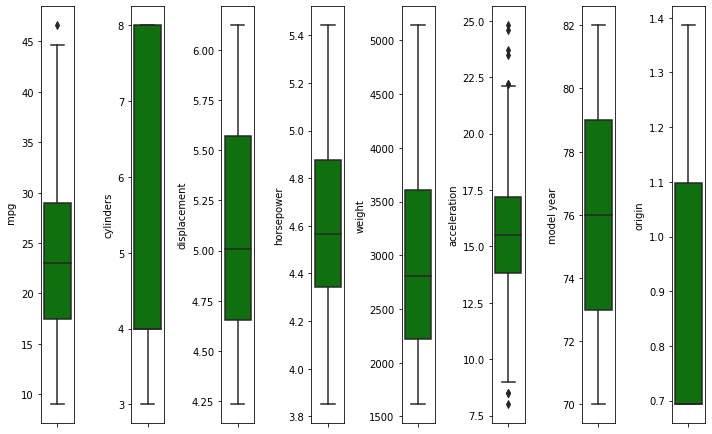

In [33]:
plt.figure(figsize=(15,60))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [34]:
#separating independent and dependent variables
df_x=df_final.drop(columns=[' mpg'])
y=df_final[[' mpg']]

In [35]:
#Scaling the data using StandardScaler
sc=StandardScaler()
sc.fit(df_x)
df_x=sc.transform(df_x)

In [36]:
x_train,x_test,y_train,y_test=train_test_split(df_x,y,test_size=0.25,random_state=42)


In [37]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(297, 7) (99, 7)
(297, 1) (99, 1)


In [38]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
KNR=KNeighborsRegressor()
DTR=DecisionTreeRegressor(random_state=42)
ABR=AdaBoostRegressor(random_state=42)
RFR=RandomForestRegressor(random_state=42)
GBR=GradientBoostingRegressor(random_state=42)
XGR=XGBRegressor(random_state=42)

In [39]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('XGBRegressor',XGR))

In [40]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
MAE=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    mae=mean_absolute_error(y_test,pre)
    print("Mean_Absolute_Error =",mae)
    MAE.append(round(mae,3))
    score= cross_val_score(model,df_x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(round(score,3))
    print('\n')

********************************* LinearRegression *********************************

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.8261619242805487
Mean_Squared_Error = 9.839176909117706
Mean_Absolute_Error = 2.337289604498228
Cross_Val_Score =  0.6343372177256473


********************************* Lasso *********************************

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  0.8013995970912382
Mean_Squared_Error = 11.240716341078983
Mean_Absolute_Error = 2.391672822202824
Cross_Val_Score =  0.5777950586483266


********************************* Ridge *********************************

 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
R2_score =  0.8264631780908375
Mean_Squared_Error 

In [41]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Mean_Absolute_Error':MAE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Mean_Absolute_Error,Cross_val_score
0,LinearRegression,0.826162,9.839,2.337,0.634
1,Lasso,0.801400,11.241,2.392,0.578
2,Ridge,0.826463,9.822,2.339,0.635
3,ElasticNet,0.793206,11.704,2.416,0.554
4,DecisionTreeRegressor,0.877458,6.936,1.940,0.509
5,KNeighborsRegressor,0.847143,8.652,2.137,0.691
6,AdaBoostRegressor,0.874416,7.108,1.953,0.704
7,RandomForestRegressor,0.845529,8.743,2.047,0.729
8,GradientBoostingRegressor,0.868637,7.435,1.838,0.736
9,XGBRegressor,0.870890,7.308,1.972,0.708


In [42]:
#Lets use GridsearchCV for hyperparamenter tuning for Decision Tree Regression
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.25)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [43]:
pipeline=Pipeline([("ss",StandardScaler()),("DTR",DecisionTreeRegressor())])
parameters = {"DTR__max_features":[1,2,3,4,5,6,7]}
clf = GridSearchCV(pipeline, parameters, cv=5,scoring="r2")
clf.fit(df_x,y)
clf.best_params_

{'DTR__max_features': 7}

In [44]:
pipeline_DTR=Pipeline([("ss",StandardScaler()),("DTR",DecisionTreeRegressor(max_features=6))])
maxr2_score(pipeline_DTR,df_x,y)

max r2 score corresponding to  42  is  0.8787443306992989


42

In [45]:
from sklearn.externals import joblib
joblib.dump(DTR,'Auto_mpg_DTR.pkl')

['Auto_mpg_DTR.pkl']